In [1]:
import requests
import json
import pandas as pd
import re

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/beverage_dispenser.json"
r = requests.get(link)
data = r.json()
data

{'content': [{'date': '2019-11-14T11:53:35.000Z',
   'product': 'refill',
   'machine': 'A'},
  {'date': '2019-11-14T12:06:35.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:07:59.000Z', 'product': 'soda', 'machine': 'A'},
  {'date': '2019-11-14T12:13:45.000Z', 'product': 'soda', 'machine': 'A'},
  {'date': '2019-11-14T12:22:35.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:37:44.000Z', 'product': 'soda', 'machine': 'A'},
  {'date': '2019-11-14T12:47:09.000Z', 'product': 'refill', 'machine': 'B'},
  {'date': '2019-11-14T12:47:52.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:51:00.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:52:49.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:55:16.000Z', 'product': 'coffee', 'machine': 'A'},
  {'date': '2019-11-14T12:55:53.000Z', 'product': 'soda', 'machine': 'A'},
  {'date': '2019-11-14T12:56:49.000Z', 'product': 'coffee', 'machin

In [2]:
df = pd.json_normalize(data, 'content')

df

,date,product,machine
0,2019-11-14T11:53:35.000Z,refill,A
1,2019-11-14T12:06:35.000Z,coffee,A
2,2019-11-14T12:07:59.000Z,soda,A
3,2019-11-14T12:13:45.000Z,soda,A
4,2019-11-14T12:22:35.000Z,coffee,A
...,...,...,...
11037,2019-12-25T20:10:53.000Z,nrj,A
11038,2019-12-25T20:16:30.000Z,nrj,B
11039,2019-12-25T20:26:35.000Z,nrj,B
11040,2019-12-25T21:11:55.000Z,nrj,B


In [3]:
df['date_time'] = df['date'].apply(lambda x: x.split('.')[0].replace('T',' '))
df['date_time']

0        2019-11-14 11:53:35
1        2019-11-14 12:06:35
2        2019-11-14 12:07:59
3        2019-11-14 12:13:45
4        2019-11-14 12:22:35
                ...         
11037    2019-12-25 20:10:53
11038    2019-12-25 20:16:30
11039    2019-12-25 20:26:35
11040    2019-12-25 21:11:55
11041    2019-12-25 21:43:36
Name: date_time, Length: 11042, dtype: object

In [4]:
df['date'] = df['date_time'].apply(lambda x: re.search('\d{4}-\d{2}-\d{2}', x).group(0))
df['hour_min'] = df['date_time'].apply(lambda x: re.search('\d{2}:\d{2}:\d{2}', x).group(0))
df = df.drop('date_time', axis=1)

In [5]:
import datetime
 
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      11042 non-null  datetime64[ns]
 1   product   11042 non-null  object        
 2   machine   11042 non-null  object        
 3   hour_min  11042 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 345.2+ KB


In [6]:
df['days'] = df['date'].apply(lambda x: x.strftime('%A'))
df['hour'] = df['hour_min'].apply(lambda x: re.search('\d{2}', x).group(0))
df

,date,product,machine,hour_min,days,hour
0,2019-11-14,refill,A,11:53:35,Thursday,11
1,2019-11-14,coffee,A,12:06:35,Thursday,12
2,2019-11-14,soda,A,12:07:59,Thursday,12
3,2019-11-14,soda,A,12:13:45,Thursday,12
4,2019-11-14,coffee,A,12:22:35,Thursday,12
...,...,...,...,...,...,...
11037,2019-12-25,nrj,A,20:10:53,Wednesday,20
11038,2019-12-25,nrj,B,20:16:30,Wednesday,20
11039,2019-12-25,nrj,B,20:26:35,Wednesday,20
11040,2019-12-25,nrj,B,21:11:55,Wednesday,21


In [7]:
df['machine'].value_counts()

C    2766
D    2765
B    2759
A    2752
Name: machine, dtype: int64

In [8]:
machineA = df.loc[df['machine'].isin(['A'])]
machineA['product'].value_counts()

coffee    1680
soda       720
nrj        346
refill       6
Name: product, dtype: int64

In [9]:
machineA['coffee'] = machineA['product'][machineA['product']=='coffee']
machineA['soda'] = machineA['product'][machineA['product']=='soda']
machineA['nrj'] = machineA['product'][machineA['product']=='nrj']
machineA['refill'] = machineA['product'][machineA['product']=='refill']
machineA

<ipython-input-9-72ef04977b7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineA['coffee'] = machineA['product'][machineA['product']=='coffee']
<ipython-input-9-72ef04977b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineA['soda'] = machineA['product'][machineA['product']=='soda']
<ipython-input-9-72ef04977b7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,date,product,machine,hour_min,days,hour,coffee,soda,nrj,refill
0,2019-11-14,refill,A,11:53:35,Thursday,11,NaN,NaN,NaN,refill
1,2019-11-14,coffee,A,12:06:35,Thursday,12,coffee,NaN,NaN,NaN
2,2019-11-14,soda,A,12:07:59,Thursday,12,NaN,soda,NaN,NaN
3,2019-11-14,soda,A,12:13:45,Thursday,12,NaN,soda,NaN,NaN
4,2019-11-14,coffee,A,12:22:35,Thursday,12,coffee,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11027,2019-12-24,nrj,A,22:33:46,Tuesday,22,NaN,NaN,nrj,NaN
11033,2019-12-25,nrj,A,18:35:33,Wednesday,18,NaN,NaN,nrj,NaN
11036,2019-12-25,nrj,A,19:40:47,Wednesday,19,NaN,NaN,nrj,NaN
11037,2019-12-25,nrj,A,20:10:53,Wednesday,20,NaN,NaN,nrj,NaN


In [10]:
machineB = df.loc[df['machine'].isin(['B'])]
machineB['product'].value_counts()

coffee    1680
soda       720
nrj        353
refill       6
Name: product, dtype: int64

In [11]:
machineB['coffee'] = machineB['product'][machineB['product']=='coffee']
machineB['soda'] = machineB['product'][machineB['product']=='soda']
machineB['nrj'] = machineB['product'][machineB['product']=='nrj']
machineB['refill'] = machineB['product'][machineB['product']=='refill']
machineB

<ipython-input-11-01480b5f6931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineB['coffee'] = machineB['product'][machineB['product']=='coffee']
<ipython-input-11-01480b5f6931>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineB['soda'] = machineB['product'][machineB['product']=='soda']
<ipython-input-11-01480b5f6931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,date,product,machine,hour_min,days,hour,coffee,soda,nrj,refill
6,2019-11-14,refill,B,12:47:09,Thursday,12,NaN,NaN,NaN,refill
13,2019-11-14,coffee,B,13:01:09,Thursday,13,coffee,NaN,NaN,NaN
14,2019-11-14,coffee,B,13:03:46,Thursday,13,coffee,NaN,NaN,NaN
16,2019-11-14,coffee,B,13:11:52,Thursday,13,coffee,NaN,NaN,NaN
21,2019-11-14,coffee,B,13:44:06,Thursday,13,coffee,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11034,2019-12-25,nrj,B,18:46:41,Wednesday,18,NaN,NaN,nrj,NaN
11035,2019-12-25,nrj,B,19:35:16,Wednesday,19,NaN,NaN,nrj,NaN
11038,2019-12-25,nrj,B,20:16:30,Wednesday,20,NaN,NaN,nrj,NaN
11039,2019-12-25,nrj,B,20:26:35,Wednesday,20,NaN,NaN,nrj,NaN


In [12]:
machineC = df.loc[df['machine'].isin(['C'])]
machineC['product'].value_counts()

coffee    1680
soda       720
nrj        360
refill       6
Name: product, dtype: int64

In [13]:
machineC['coffee'] = machineC['product'][machineC['product']=='coffee']
machineC['soda'] = machineC['product'][machineC['product']=='soda']
machineC['nrj'] = machineC['product'][machineC['product']=='nrj']
machineC['refill'] = machineC['product'][machineC['product']=='refill']
machineC

<ipython-input-13-71847774b79e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineC['coffee'] = machineC['product'][machineC['product']=='coffee']
<ipython-input-13-71847774b79e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineC['soda'] = machineC['product'][machineC['product']=='soda']
<ipython-input-13-71847774b79e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,date,product,machine,hour_min,days,hour,coffee,soda,nrj,refill
24,2019-11-14,refill,C,13:51:23,Thursday,13,NaN,NaN,NaN,refill
26,2019-11-14,coffee,C,14:00:23,Thursday,14,coffee,NaN,NaN,NaN
27,2019-11-14,coffee,C,14:03:36,Thursday,14,coffee,NaN,NaN,NaN
30,2019-11-14,coffee,C,14:13:08,Thursday,14,coffee,NaN,NaN,NaN
31,2019-11-14,soda,C,14:15:43,Thursday,14,NaN,soda,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10957,2019-12-24,coffee,C,10:38:35,Tuesday,10,coffee,NaN,NaN,NaN
10960,2019-12-24,coffee,C,10:42:04,Tuesday,10,coffee,NaN,NaN,NaN
10974,2019-12-24,coffee,C,11:55:14,Tuesday,11,coffee,NaN,NaN,NaN
10978,2019-12-24,coffee,C,12:02:52,Tuesday,12,coffee,NaN,NaN,NaN


In [14]:
machineD = df.loc[df['machine'].isin(['D'])]
machineD['product'].value_counts()

coffee    1680
soda       720
nrj        359
refill       6
Name: product, dtype: int64

In [15]:
machineD['coffee'] = machineD['product'][machineD['product']=='coffee']
machineD['soda'] = machineD['product'][machineD['product']=='soda']
machineD['nrj'] = machineD['product'][machineD['product']=='nrj']
machineD['refill'] = machineD['product'][machineD['product']=='refill']
machineD

<ipython-input-15-2457bc1dcc0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineD['coffee'] = machineD['product'][machineD['product']=='coffee']
<ipython-input-15-2457bc1dcc0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machineD['soda'] = machineD['product'][machineD['product']=='soda']
<ipython-input-15-2457bc1dcc0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,date,product,machine,hour_min,days,hour,coffee,soda,nrj,refill
43,2019-11-14,refill,D,14:54:30,Thursday,14,NaN,NaN,NaN,refill
48,2019-11-14,coffee,D,15:06:30,Thursday,15,coffee,NaN,NaN,NaN
51,2019-11-14,soda,D,15:19:49,Thursday,15,NaN,soda,NaN,NaN
66,2019-11-14,coffee,D,15:59:54,Thursday,15,coffee,NaN,NaN,NaN
68,2019-11-14,soda,D,16:00:39,Thursday,16,NaN,soda,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11015,2019-12-24,coffee,D,16:14:16,Tuesday,16,coffee,NaN,NaN,NaN
11019,2019-12-24,coffee,D,17:01:20,Tuesday,17,coffee,NaN,NaN,NaN
11020,2019-12-24,nrj,D,17:37:57,Tuesday,17,NaN,NaN,nrj,NaN
11024,2019-12-24,nrj,D,20:34:39,Tuesday,20,NaN,NaN,nrj,NaN


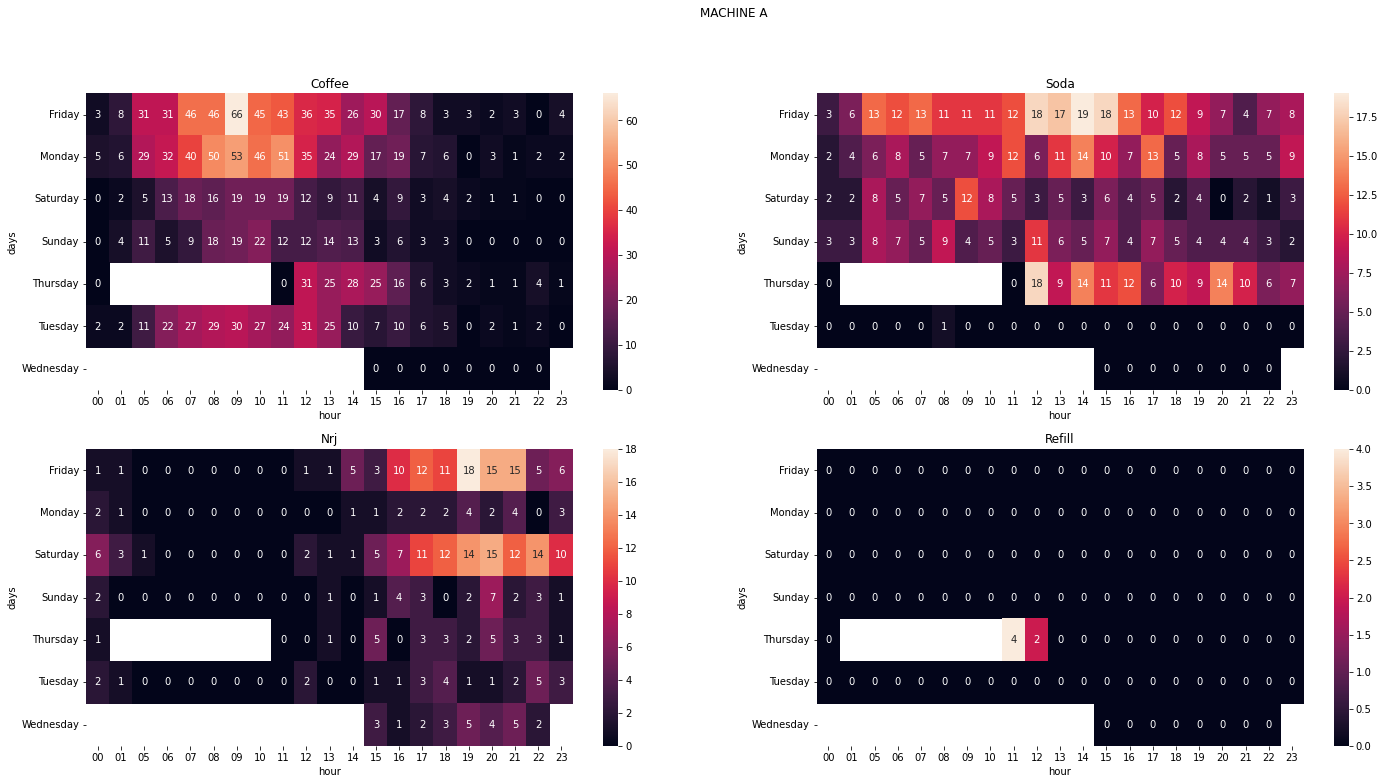

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(24,12))
fig.suptitle('MACHINE A')

pivoted_machineAcoffee = machineA.pivot_table(index='days', columns='hour', values='coffee', aggfunc='count')
sns.heatmap(pivoted_machineAcoffee, ax=axes[0, 0], annot=True)
axes[0,0].set_title('Coffee')

pivoted_machineAsoda = machineA.pivot_table(index='days', columns='hour', values='soda', aggfunc='count')
sns.heatmap(pivoted_machineAsoda, ax=axes[0, 1], annot=True)
axes[0,1].set_title('Soda')

pivoted_machineAnrj = machineA.pivot_table(index='days', columns='hour', values='nrj', aggfunc='count')
sns.heatmap(pivoted_machineAnrj, ax=axes[1, 0], annot=True)
axes[1,0].set_title('Nrj')

pivoted_machineArefill = machineA.pivot_table(index='days', columns='hour', values='refill', aggfunc='count')
sns.heatmap(pivoted_machineArefill, ax=axes[1, 1], annot=True)
axes[1,1].set_title('Refill')

plt.show()

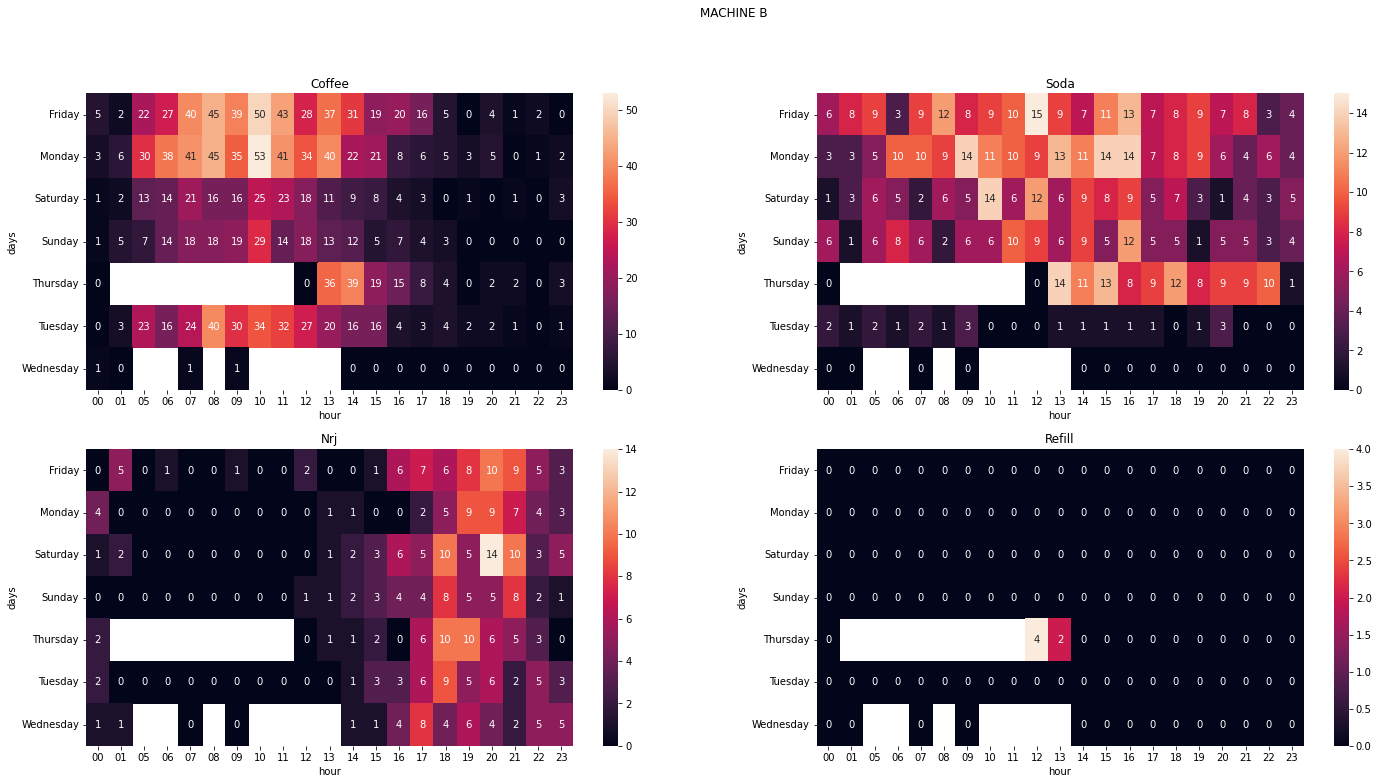

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(24,12))
fig.suptitle('MACHINE B')

pivoted_machineBcoffee = machineB.pivot_table(index='days', columns='hour', values='coffee', aggfunc='count')
sns.heatmap(pivoted_machineBcoffee, ax=axes[0, 0], annot=True)
axes[0,0].set_title('Coffee')

pivoted_machineBsoda = machineB.pivot_table(index='days', columns='hour', values='soda', aggfunc='count')
sns.heatmap(pivoted_machineBsoda, ax=axes[0, 1], annot=True)
axes[0,1].set_title('Soda')

pivoted_machineBnrj = machineB.pivot_table(index='days', columns='hour', values='nrj', aggfunc='count')
sns.heatmap(pivoted_machineBnrj, ax=axes[1, 0], annot=True)
axes[1,0].set_title('Nrj')

pivoted_machineBrefill = machineB.pivot_table(index='days', columns='hour', values='refill', aggfunc='count')
sns.heatmap(pivoted_machineBrefill, ax=axes[1, 1], annot=True)
axes[1,1].set_title('Refill')

plt.show()

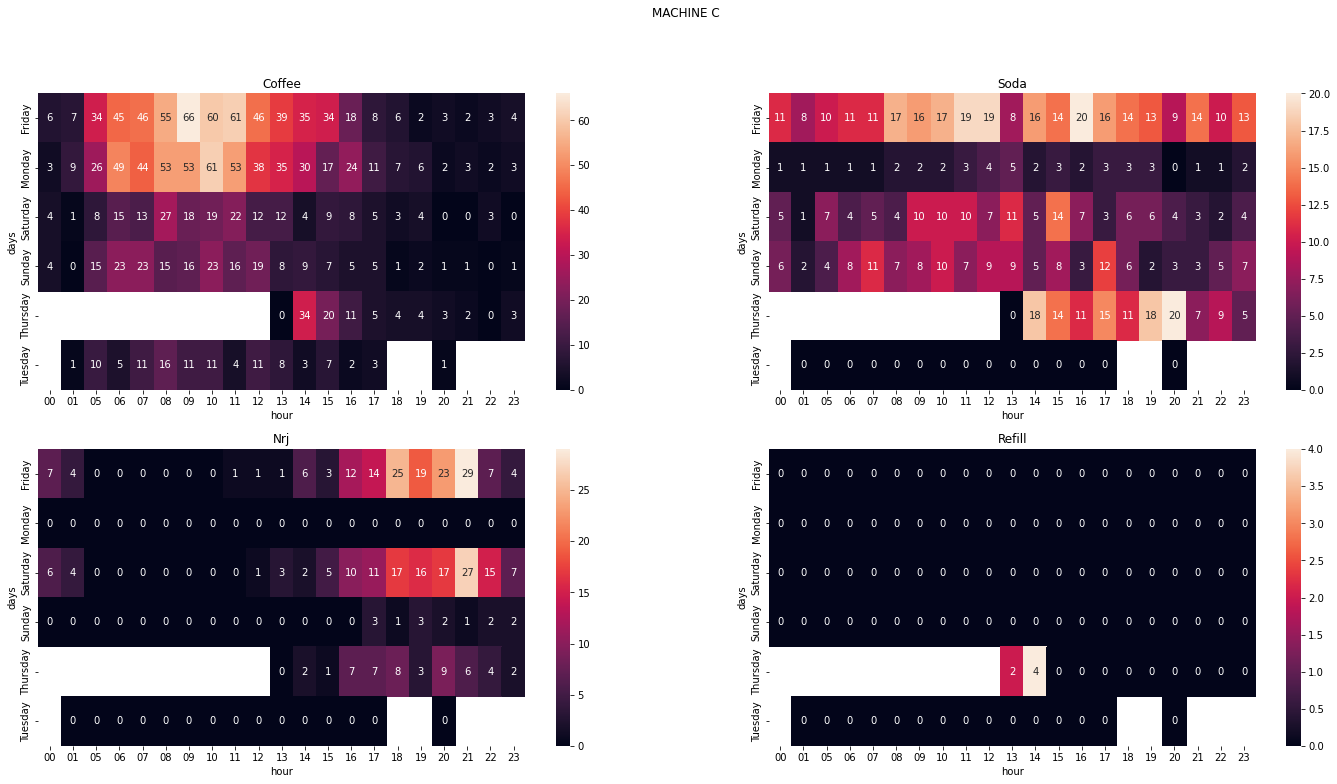

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(24,12))
fig.suptitle('MACHINE C')

pivoted_machineCcoffee = machineC.pivot_table(index='days', columns='hour', values='coffee', aggfunc='count')
sns.heatmap(pivoted_machineCcoffee, ax=axes[0, 0], annot=True)
axes[0,0].set_title('Coffee')

pivoted_machineCsoda = machineC.pivot_table(index='days', columns='hour', values='soda', aggfunc='count')
sns.heatmap(pivoted_machineCsoda, ax=axes[0, 1], annot=True)
axes[0,1].set_title('Soda')

pivoted_machineCnrj = machineC.pivot_table(index='days', columns='hour', values='nrj', aggfunc='count')
sns.heatmap(pivoted_machineCnrj, ax=axes[1, 0], annot=True)
axes[1,0].set_title('Nrj')

pivoted_machineCrefill = machineC.pivot_table(index='days', columns='hour', values='refill', aggfunc='count')
sns.heatmap(pivoted_machineCrefill, ax=axes[1, 1], annot=True)
axes[1,1].set_title('Refill')

plt.show()

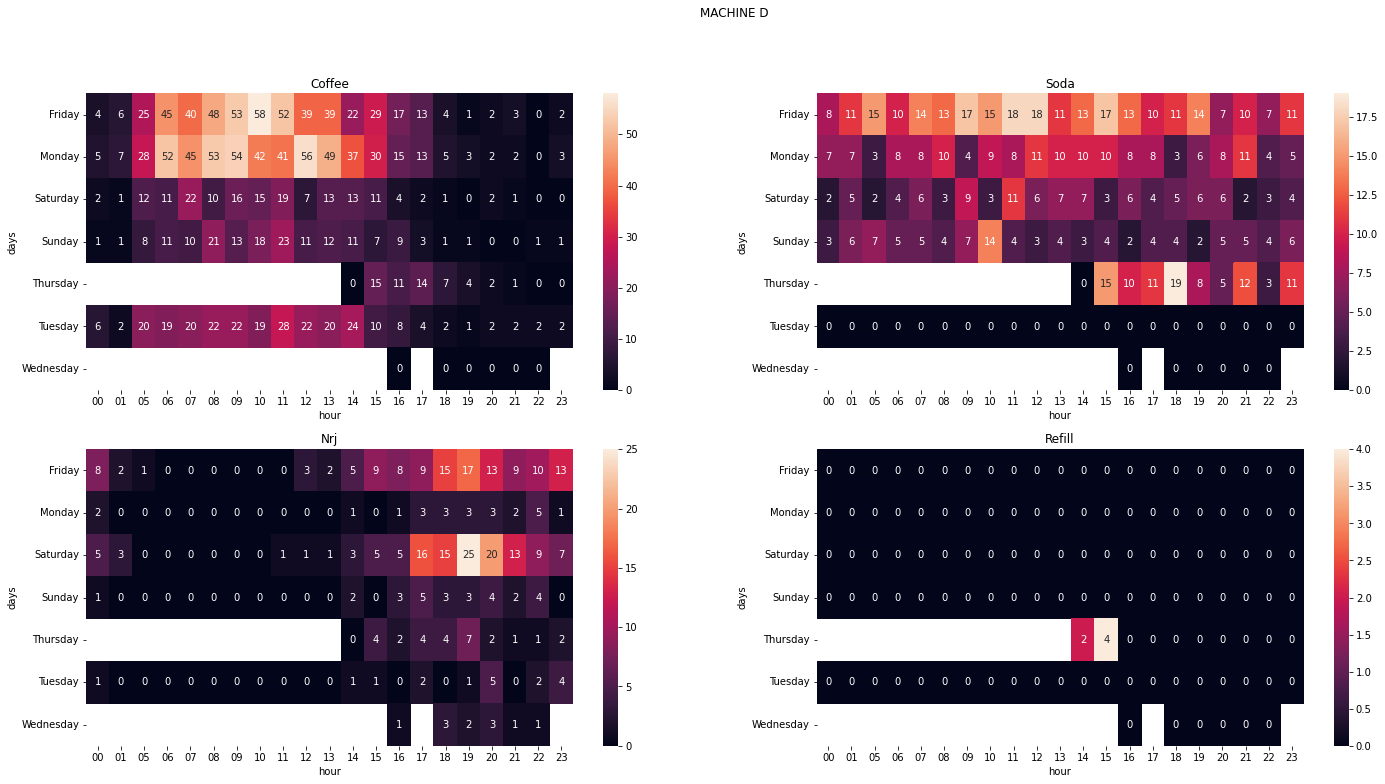

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(24,12))
fig.suptitle('MACHINE D')

pivoted_machineDcoffee = machineD.pivot_table(index='days', columns='hour', values='coffee', aggfunc='count')
sns.heatmap(pivoted_machineDcoffee, ax=axes[0, 0], annot=True)
axes[0,0].set_title('Coffee')

pivoted_machineDsoda = machineD.pivot_table(index='days', columns='hour', values='soda', aggfunc='count')
sns.heatmap(pivoted_machineDsoda, ax=axes[0, 1], annot=True)
axes[0,1].set_title('Soda')

pivoted_machineDnrj = machineD.pivot_table(index='days', columns='hour', values='nrj', aggfunc='count')
sns.heatmap(pivoted_machineDnrj, ax=axes[1, 0], annot=True)
axes[1,0].set_title('Nrj')

pivoted_machineDrefill = machineD.pivot_table(index='days', columns='hour', values='refill', aggfunc='count')
sns.heatmap(pivoted_machineDrefill, ax=axes[1, 1], annot=True)
axes[1,1].set_title('Refill')

plt.show()